In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib
import matplotlib.ticker as ticker
import numpy as np

In [2]:
강수량 = pd.read_csv('강수량(19902024).csv')
사료원료비용 = pd.read_excel('식품제조업(10인 이상)(주요생산비)(2007~2022).xlsx')

In [3]:
강수량

,년,강수량(mm)
0,1990,1598.0
1,1991,1362.0
2,1992,1108.3
3,1993,1406.4
4,1994,918.6
5,1995,1074.9
6,1996,1088.1
7,1997,1384.3
8,1998,1776.0
9,1999,1679.1


In [4]:
사료원료비용

,"식품제조업(10인 이상)(출하액,주요생산비,부가가치)(2007~2022)",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,단위 : 백만원,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,산업별,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
2,NaN,주요생산비,주요생산비,주요생산비,주요생산비,주요생산비,주요생산비,주요생산비,주요생산비,주요생산비,주요생산비,주요생산비,주요생산비,주요생산비,주요생산비,주요생산비,주요생산비
3,□ 동물용 사료 및 조제식품 제조업,4227292,5969008,6458254,0,7137402,8763148,9041802,8327012,8086562,7620264,7335684,7467729,8074830,8009505,9795658,13030862
4,- 배합 사료 제조업,4146445,5853858,6355034,0,7020087,8513082,8643909,7944998,7712861,7220835,6975547,7023351,7567183,7562258,9228408,12374245
5,- 단미사료 및 기타 사료 제조업,80847,115150,103220,0,117315,250066,397893,382014,373701,399429,360137,444378,507647,447247,567250,656617


In [5]:
사료원료비용.drop(0, inplace=True)
사료원료비용.columns = 사료원료비용.loc[1]
사료원료비용.drop(range(1,3), inplace=True)
사료원료비용.drop(range(4,6), inplace=True)
사료원료비용=사료원료비용.T
사료원료비용.insert(0, 'Index', 사료원료비용.index)
사료원료비용.reset_index(drop=True, inplace=True)
사료원료비용.columns = 사료원료비용.loc[0]
사료원료비용.drop(0, inplace=True)
사료원료비용.columns=['년', '동물용 사료 주요생산비']
사료원료비용.reset_index(drop=True, inplace=True)
사료원료비용 = 사료원료비용.astype({'년': int, '동물용 사료 주요생산비': int})
사료원료비용.replace(0, np.nan, inplace=True)
사료원료비용_interpolated = 사료원료비용.interpolate(method='linear')
사료원료비용_interpolated

,년,동물용 사료 주요생산비
0,2007,4227292.0
1,2008,5969008.0
2,2009,6458254.0
3,2010,6797828.0
4,2011,7137402.0
5,2012,8763148.0
6,2013,9041802.0
7,2014,8327012.0
8,2015,8086562.0
9,2016,7620264.0


In [6]:
강수량['년'] = 강수량['년'].astype(int)
precipitation_raw_material = pd.merge(강수량, 사료원료비용_interpolated, on='년', how='inner')
precipitation_raw_material

,년,강수량(mm),동물용 사료 주요생산비
0,2007,1461.1,4227292.0
1,2008,1002.0,5969008.0
2,2009,1244.7,6458254.0
3,2010,1464.6,6797828.0
4,2011,1658.0,7137402.0
5,2012,1488.7,8763148.0
6,2013,1187.0,9041802.0
7,2014,1189.0,8327012.0
8,2015,959.8,8086562.0
9,2016,1289.1,7620264.0


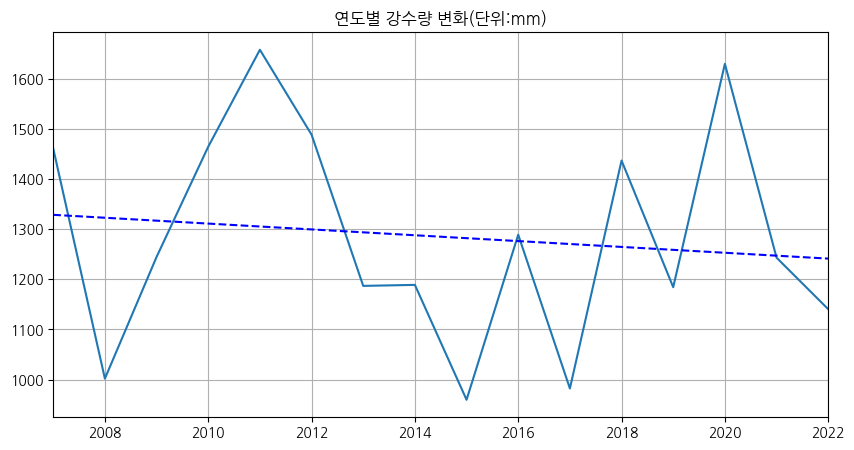

In [7]:
plt.figure(figsize=(10,5))
plt.plot(precipitation_raw_material['년'], precipitation_raw_material['강수량(mm)'])

z = np.polyfit(precipitation_raw_material['년'], precipitation_raw_material['강수량(mm)'], 1)
p = np.poly1d(z)
plt.plot(precipitation_raw_material['년'], p(precipitation_raw_material['년']), 'b--')

plt.title('연도별 강수량 변화(단위:mm)')
plt.xlim(2007,2022)
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(1))
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
plt.grid()
plt.show()

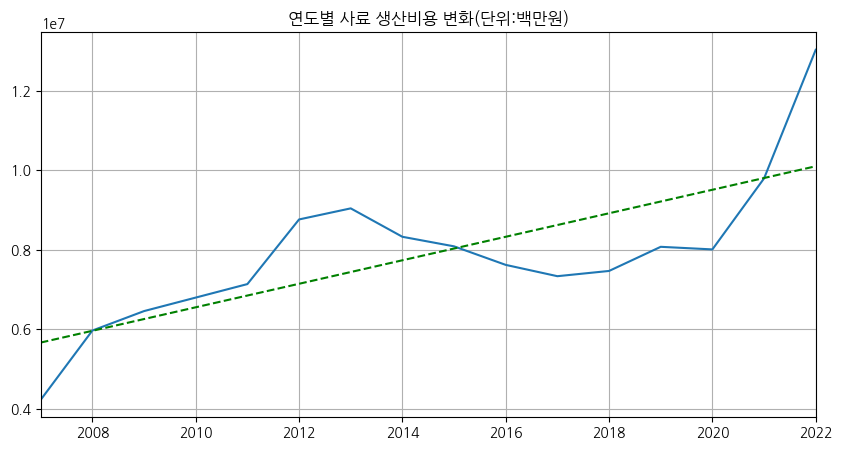

In [8]:
plt.figure(figsize=(10,5))
plt.plot(precipitation_raw_material['년'], precipitation_raw_material['동물용 사료 주요생산비'])

z = np.polyfit(precipitation_raw_material['년'], precipitation_raw_material['동물용 사료 주요생산비'], 1)
p = np.poly1d(z)
plt.plot(precipitation_raw_material['년'], p(precipitation_raw_material['년']), '--', color='green')

plt.title('연도별 사료 생산비용 변화(단위:백만원)')
plt.xlim(2007,2022)
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(1))
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
plt.grid()
plt.show()

In [9]:
precipitation_raw_material.corr()

,년,강수량(mm),동물용 사료 주요생산비
년,1.000000,-0.126792,0.742491
강수량(mm),-0.126792,1.000000,-0.202532
동물용 사료 주요생산비,0.742491,-0.202532,1.000000
